# Section C (Algorithm implementation using packages)

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn tabulate

Note: you may need to restart the kernel to use updated packages.


In [16]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1)
1. Taking first 8000 samples for training and 2000 samples for testing
2. Min_Max Scaling to from 0-255 to 0-1 Range

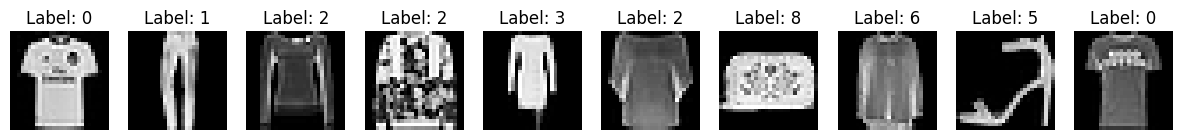

In [17]:
# Load data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Split the data
"""
Taking first 8000 samples for training and 2000 samples for testing
"""

X_train = train_data.iloc[:8000, 1:].values / 255.0  # Normalize pixel values
y_train = train_data.iloc[:8000, 0].values           # Labels
X_test = test_data.iloc[:2000, 1:].values / 255.0
y_test = test_data.iloc[:2000, 0].values

# Visualize 10 samples
fig, axes = plt.subplots(1, 10, figsize=(15, 15))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y_test[i]}")
plt.show()

## 2)
1.


In [18]:
"""
Stopping ConvergenceWarning
"""
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
# Split data into training and validation sets (e.g., 80-20 split)
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameters
hidden_layer_sizes = (128, 64, 32)
learning_rate = 2e-5
batch_size = 128
max_iter = 100
activations = ['logistic', 'tanh', 'relu', 'identity']


Training with activation function: logistic
Epoch 1 - Training Loss: 2.3345 | Validation Loss: 2.3297
Training with activation function: tanh
Epoch 1 - Training Loss: 2.1010 | Validation Loss: 2.1151
Training with activation function: relu
Epoch 1 - Training Loss: 2.1513 | Validation Loss: 2.1515
Training with activation function: identity
Epoch 1 - Training Loss: 2.1163 | Validation Loss: 2.1240


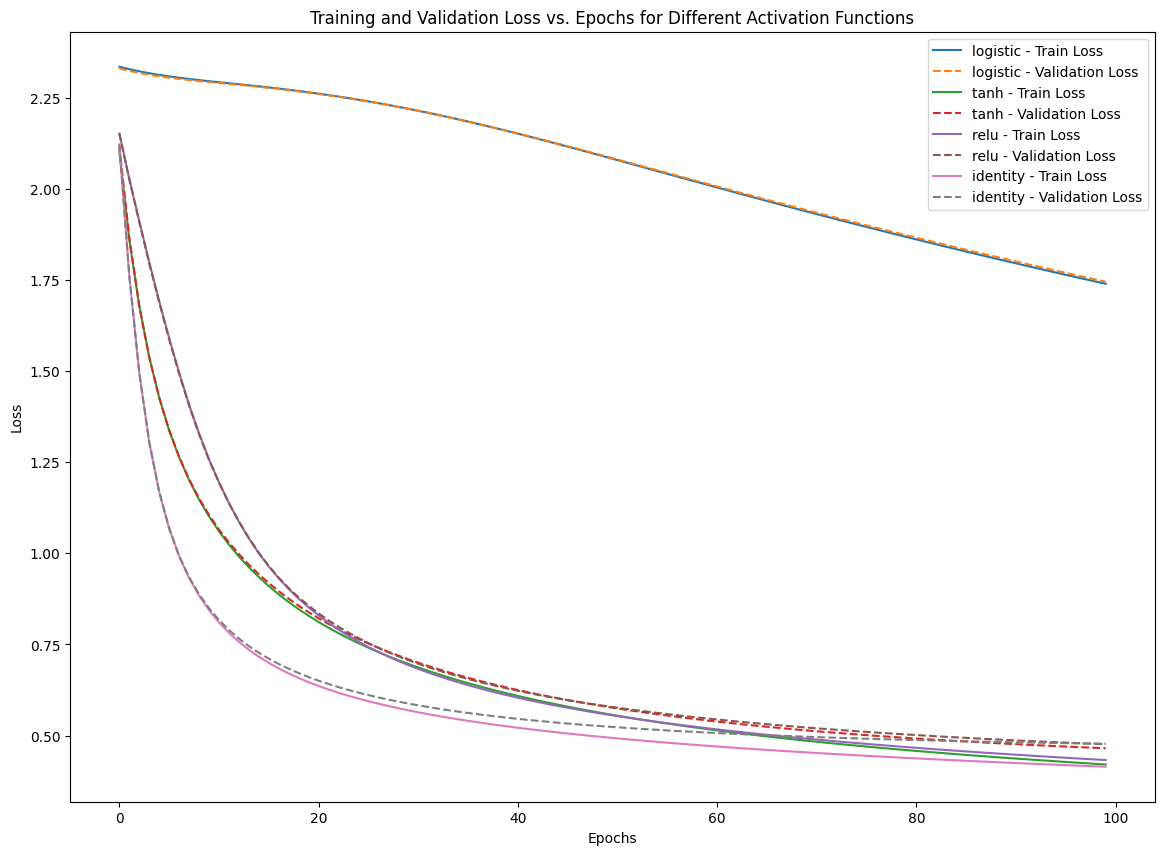


Model Performance Summary:
+-----------------------+-----------------+
| Activation Function   |   Test Accuracy |
+=======================+=================+
| logistic              |          0.441  |
+-----------------------+-----------------+
| tanh                  |          0.8305 |
+-----------------------+-----------------+
| relu                  |          0.822  |
+-----------------------+-----------------+
| identity              |          0.8225 |
+-----------------------+-----------------+


In [20]:
from tabulate import tabulate
# Dictionary to store accuracies for each activation function
accuracies = {}
# Dictionary to store training and validation losses for each activation function
losses = {act: {'train': [], 'val': []} for act in activations}

# Train the MLPClassifier with different activation functions
for act in activations:
    print(f"Training with activation function: {act}")
    
    # Initialize the classifier
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                        solver='adam', 
                        learning_rate_init=learning_rate, 
                        batch_size=batch_size, 
                        max_iter=1,      # Setting max_iter to 1 so we can iterate manually for 100 epochs
                        warm_start=True, # This allows training to continue from the previous state
                        activation=act, 
                        random_state=42)
    
    # Training loop for 100 epochs
    for epoch in range(100):
        # Train for one epoch
        mlp.fit(X_train_full, y_train_full)
        
        # Record the training and validation loss
        y_train_pred_proba = mlp.predict_proba(X_train_full)
        y_val_pred_proba = mlp.predict_proba(X_val)
        
        train_loss = log_loss(y_train_full, y_train_pred_proba)
        val_loss = log_loss(y_val, y_val_pred_proba)
        
        losses[act]['train'].append(train_loss)
        losses[act]['val'].append(val_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch + 1} - Training Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

    # Reporting the model's accuracy on the test set
    # Store accuracy for each activation
    test_accuracy = mlp.score(X_test, y_test)
    accuracies[act] = test_accuracy

# Plot the training and validation loss vs. epochs for each activation function
plt.figure(figsize=(14, 10))
for act in activations:
    plt.plot(losses[act]['train'], label=f'{act} - Train Loss')
    plt.plot(losses[act]['val'], label=f'{act} - Validation Loss', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs for Different Activation Functions')
plt.legend()
plt.show()

# Create table data
table_data = [[act, f"{acc:.4f}"] for act, acc in accuracies.items()]
headers = ["Activation Function", "Test Accuracy"]

# Display the table
print("\nModel Performance Summary:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))


TanH gave the lowest validation and training losses after 100 iterations

## 3)


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(128, 64, 32)],  # Fixed as per previous results
    'solver': ['adam', 'sgd'],  # Possible solvers
    'learning_rate_init': [1e-4, 2e-5, 1e-5],  # Different learning rates
    'batch_size': [64, 128, 256],  # Different batch sizes
    'max_iter': [100],  # Fixed number of iterations
    'activation': ['tanh']  # Best activation function from part 2
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp, 
                           param_grid=param_grid, 
                           scoring='neg_log_loss',  # Use negative log loss for evaluation
                           cv=3,  # 3-fold cross-validation
                           verbose=2,  # Verbose output
                           n_jobs=-1)  # Use all available cores

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Output the best parameters found
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score (Negative Log Loss):", best_score)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Hyperparameters: {'activation': 'tanh', 'batch_size': 256, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.0001, 'max_iter': 100, 'solver': 'adam'}
Best Cross-Validation Score (Negative Log Loss): -0.42264034069705847


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Hyperparameters: {'activation': 'tanh', 'batch_size': 256, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.0001, 'max_iter': 100, 'solver': 'adam'}
Best Cross-Validation Score (Negative Log Loss): -0.3277307877098515


## 4)


Epoch 10 - Training Loss: 0.0600 | Validation Loss: 0.0602
Epoch 20 - Training Loss: 0.0410 | Validation Loss: 0.0409
Epoch 30 - Training Loss: 0.0345 | Validation Loss: 0.0343
Epoch 40 - Training Loss: 0.0304 | Validation Loss: 0.0303
Epoch 50 - Training Loss: 0.0281 | Validation Loss: 0.0279
Epoch 60 - Training Loss: 0.0267 | Validation Loss: 0.0265
Epoch 70 - Training Loss: 0.0257 | Validation Loss: 0.0255
Epoch 80 - Training Loss: 0.0250 | Validation Loss: 0.0248
Epoch 90 - Training Loss: 0.0244 | Validation Loss: 0.0241
Epoch 100 - Training Loss: 0.0238 | Validation Loss: 0.0236
Epoch 10 - Training Loss: 0.0543 | Validation Loss: 0.0543
Epoch 20 - Training Loss: 0.0378 | Validation Loss: 0.0375
Epoch 30 - Training Loss: 0.0303 | Validation Loss: 0.0301
Epoch 40 - Training Loss: 0.0270 | Validation Loss: 0.0267
Epoch 50 - Training Loss: 0.0249 | Validation Loss: 0.0247
Epoch 60 - Training Loss: 0.0235 | Validation Loss: 0.0232
Epoch 70 - Training Loss: 0.0224 | Validation Loss: 0.0

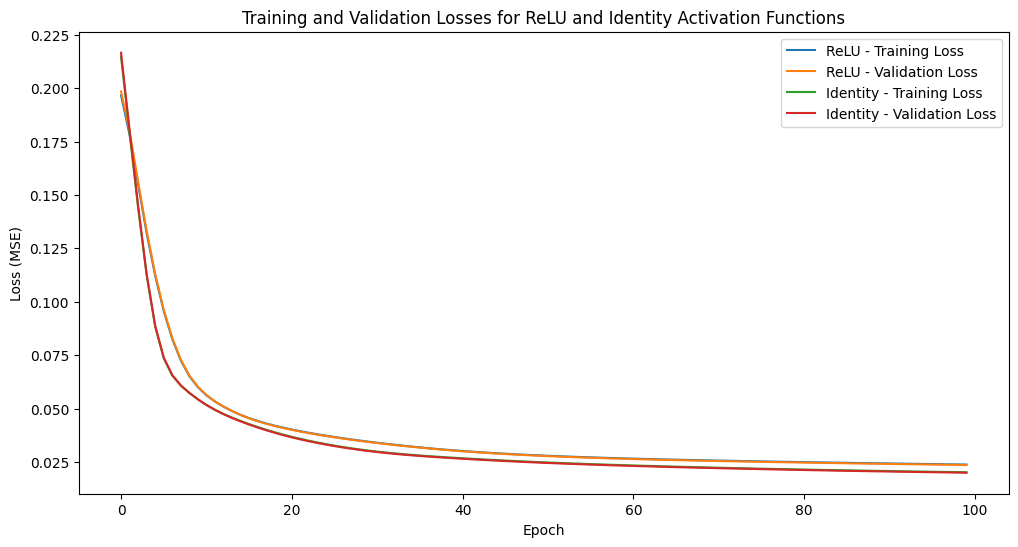

ReLU Model Regenerated Images:


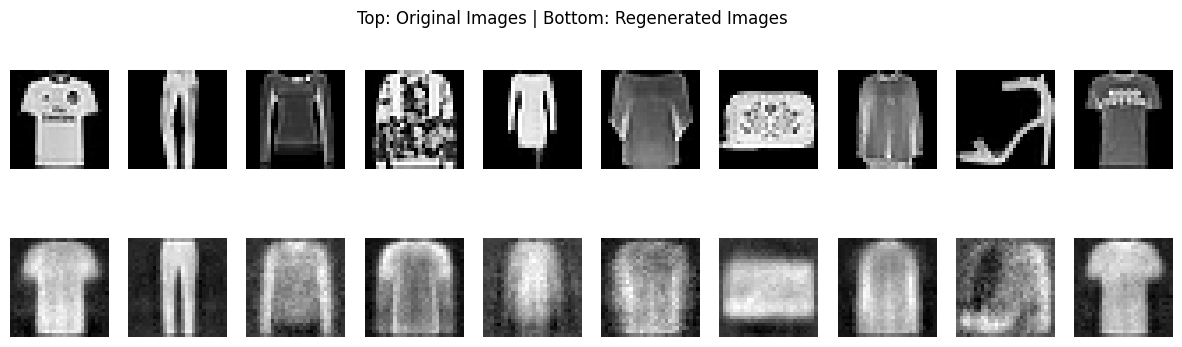

Identity Model Regenerated Images:


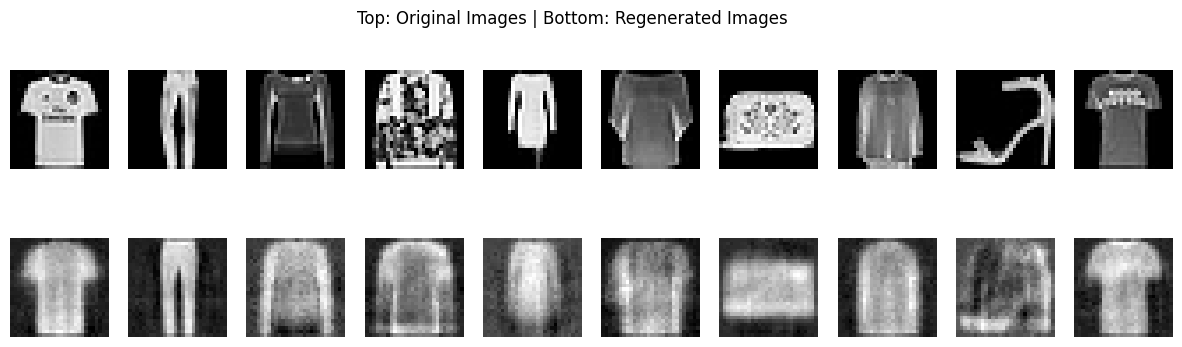

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Define layer sizes as [c, b, a, b, c]
# a = 32, b = 64, c = 128
layer_sizes = [128, 64, 32, 64, 128]
learning_rate = 2e-5

# Training configurations
epochs = 100
batch_size = 128  # Can adjust if memory issues arise

# Function to train and evaluate the MLPRegressor
def train_mlp_regressor(X_train, X_val, activation):
    model = MLPRegressor(
        hidden_layer_sizes=layer_sizes,
        activation=activation,
        solver='adam',
        learning_rate_init=learning_rate,
        max_iter=1,
        warm_start=True,  # To allow for epoch-wise training
        batch_size=batch_size,
        random_state=42
    )
    
    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        # Train the model for one epoch
        model.fit(X_train, X_train)  # Target is the input for regeneration
        
        # Calculate training loss
        train_loss = mean_squared_error(X_train, model.predict(X_train))
        training_losses.append(train_loss)
        
        # Calculate validation loss
        val_loss = mean_squared_error(X_val, model.predict(X_val))
        validation_losses.append(val_loss)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1} - Training Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")
    
    return model, training_losses, validation_losses

# Train the two models with different activations
relu_model, relu_train_losses, relu_val_losses = train_mlp_regressor(X_train, X_val, activation='relu')
identity_model, identity_train_losses, identity_val_losses = train_mlp_regressor(X_train, X_val, activation='identity')

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(relu_train_losses, label="ReLU - Training Loss")
plt.plot(relu_val_losses, label="ReLU - Validation Loss")
plt.plot(identity_train_losses, label="Identity - Training Loss")
plt.plot(identity_val_losses, label="Identity - Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training and Validation Losses for ReLU and Identity Activation Functions")
plt.show()

# Visualize 10 regenerated images from the test set for each model
def plot_regenerated_images(model, X_test, original_images):
    regenerated_images = model.predict(X_test)
    plt.figure(figsize=(15, 4))
    for i in range(10):
        # Original Image
        plt.subplot(2, 10, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        # Regenerated Image
        plt.subplot(2, 10, i + 11)
        plt.imshow(regenerated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle("Top: Original Images | Bottom: Regenerated Images")
    plt.show()

# Visualize the images for ReLU model
print("ReLU Model Regenerated Images:")
plot_regenerated_images(relu_model, X_test[:10], X_test[:10])

# Visualize the images for Identity model
print("Identity Model Regenerated Images:")
plot_regenerated_images(identity_model, X_test[:10], X_test[:10])


In [23]:
# saving model in a pickle file
#  to avoid training the model again
import pickle   
pickle.dump(relu_model, open('relu_model_part_4.pkl', 'wb'))
pickle.dump(identity_model, open('identity_model_part_4.pkl', 'wb'))

### Observations : 
1. **ReLU Model**:
   1.  Regenerated images are basic and somewhat blurry, retaining only rough outlines.
   2.  This could suggest that ReLU struggled to capture subtle details and gradients within the images, potentially due to the hard zeroing out of values, which could impact the model's ability to represent nuanced variations.
   3.  Training and validation loss decrease steadily, showing good generalization.

2. **Identity Model**:
   1.  Similar in quality but is some instances, Slightly better detail retention with smoother gradients. 
   2.  The identity function (a linear function) may allow for smoother gradient flow, which could be why these images look marginally less harshly "blocked" or pixelated compared to the ReLU outputs.
   3. Loss also decreases smoothly, with marginally lower final values than ReLU.

3. **Comparison**: Both models show relatively smooth convergence in terms of loss, indicating they are learning the regeneration task. Both models produce low-detail regenerations. Identity slightly outperforms ReLU in detail retention, but both struggle with fine details. More layers or tuning may improve results.

## 5)

1. **Feature Extraction from Trained Models**: 
   - Pass the training and test data samples through the trained ReLU and Identity networks, up to the bottleneck layer (where the feature vector of size ‘a’ resides).
   - Capture the output at this layer as the feature vector for each sample, which serves as a compressed representation of the original image.

2. **Training New MLP Classifiers**:
   - Use the extracted feature vectors as input for two smaller MLP classifiers, each with 2 layers of size 'a'. 
   - Set the MLPs to use the same solver and learning rate as the MLP Classifier in part 2.
   - Train these new classifiers for 200 iterations and evaluate them on the test data.

3. **Accuracy Metrics and Comparison**:
   - Calculate and report accuracy metrics (accuracy, precision, recall, etc.) for the two new classifiers.
   - Compare these results with the original MLP Classifier trained in part 2.

4. **Why this Method Works**:
   - **Feature Compression**: The bottleneck layer extracts essential image features, focusing on patterns like edges, shapes, and textures, which are important for classification.
   - **Dimensionality Reduction**: With fewer dimensions, the classifier has fewer parameters to learn, reducing overfitting and improving generalization.
   - **Pretrained Network Knowledge**: The feature vectors carry over useful, high-level representations learned by the ReLU and Identity networks, which enhances classification performance even in a smaller model.

This approach leverages the autoencoder-like structure of the original networks to create a compact, informative feature representation, enabling efficient and effective classification without the need for high-dimensional inputs.

In [24]:
from sklearn.neural_network import MLPRegressor
import numpy as np

def extract_features_from_layer(model, X, layer_index=2):
    """
    Manually extracts features from the specific intermediate layer (e.g., 3rd layer).
    that is of size a = 128
    """
    # Initialize input as X
    activations = X

    # Forward pass through each layer up to the target layer
    for i in range(layer_index + 1):
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
        # Apply activation function of the model
        if model.activation == 'relu':
            activations = np.maximum(0, activations)
        elif model.activation == 'identity':
            pass  # No change for identity activation
        else:
            raise ValueError("Only 'relu' and 'identity' activations supported in this example.")

    return activations

# Example usage:
# Extract features from the ReLU network's middle layer
relu_train_features = extract_features_from_layer(relu_model, X_train, layer_index=2)
relu_test_features = extract_features_from_layer(relu_model, X_test, layer_index=2)

# Extract features from the Identity network's middle layer
identity_train_features = extract_features_from_layer(identity_model, X_train, layer_index=2)
identity_test_features = extract_features_from_layer(identity_model, X_test, layer_index=2)

# Verify shapes
print("ReLU features shape (train):", relu_train_features.shape)
print("ReLU features shape (test):", relu_test_features.shape)
print("Identity features shape (train):", identity_train_features.shape)
print("Identity features shape (test):", identity_test_features.shape)


ReLU features shape (train): (8000, 32)
ReLU features shape (test): (2000, 32)
Identity features shape (train): (8000, 32)
Identity features shape (test): (2000, 32)


## Training the model with new features of size 'a'

In [25]:
# Create and train new MLP Classifier using ReLU features
relu_small_classifier = MLPClassifier(
    hidden_layer_sizes=(128, 128),  # Two layers of size 'a'
    max_iter=200, # training for 200 iterations
    solver='adam',
    learning_rate_init=2e-5
)
relu_small_classifier.fit(relu_train_features, y_train)

# Create and train new MLP Classifier using Identity features
identity_small_classifier = MLPClassifier(
    hidden_layer_sizes=(128, 128),  # Two layers of size 'a'
    max_iter=200, # training for 200 iterations
    solver='adam',
    learning_rate_init=2e-5
)
identity_small_classifier.fit(identity_train_features, y_train)

# Evaluate performance
relu_accuracy = relu_small_classifier.score(relu_test_features, y_test)
identity_accuracy = identity_small_classifier.score(identity_test_features, y_test)

print("\nAccuracy Metrics:")
print(f"ReLU Features Classifier Accuracy: {relu_accuracy:.4f}")
print(f"Identity Features Classifier Accuracy: {identity_accuracy:.4f}")

# # Compare with original classifier accuracy from part 2
# print(f"\nOriginal ReLU Model Accuracy: {relu_model.score(X_test, y_test):.4f}")
# print(f"Original Identity Model Accuracy: {identity_model.score(X_test, y_test):.4f}")


Accuracy Metrics:
ReLU Features Classifier Accuracy: 0.7740
Identity Features Classifier Accuracy: 0.8115


---

# Section B (Scratch Implementation)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import pickle

## 1)

In [4]:
class NeuralNetwork:
    def __init__(self, N, layer_sizes, lr, activation='relu', weight_init='random', epochs=100, batch_size=32):
        self.N = N  # Number of layers
        self.layer_sizes = layer_sizes  # List of neurons per layer
        self.lr = lr  # Learning rate
        self.activation = activation
        self.weight_init = weight_init
        self.epochs = epochs
        self.batch_size = batch_size
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        # # Initialize network parameters
        # for i in range(len(layer_sizes)-1):
        #     if weight_init == 'random':
        #         w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
        #     elif weight_init == 'xavier':
        #         w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0/(layer_sizes[i] + layer_sizes[i+1]))
            
        #     b = np.zeros((1, layer_sizes[i+1]))
        #     self.weights.append(w)
        #     self.biases.append(b)
    
    # def activation_function(self, x, derivative=False):
    #     if self.activation == 'relu':
    #         return Activations.relu(x, derivative)
    #     elif self.activation == 'sigmoid':
    #         return Activations.sigmoid(x, derivative)
    #     elif self.activation == 'tanh':
    #         return Activations.tanh(x, derivative)
    #     elif self.activation == 'leaky_relu':
    #         return Activations.leaky_relu(x, derivative)
    
    # def softmax(self, x):
    #     exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    #     return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward_pass(self, X):
        activations = [X]
        layer_inputs = []
        
        # Hidden layers
        for i in range(self.N-2):
            layer_input = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            layer_inputs.append(layer_input)
            activation = self.activation_function(layer_input)
            activations.append(activation)
        
        # Output layer
        output_input = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(output_input)
        activations.append(output)
        layer_inputs.append(output_input)
        
        return activations, layer_inputs
    
    def backward_pass(self, X, y, activations, layer_inputs):
        m = X.shape[0]
        
        # Convert y to one-hot encoding
        y_one_hot = np.zeros((m, self.layer_sizes[-1]))
        y_one_hot[np.arange(m), y] = 1
        
        # Initialize gradients
        weight_gradients = [np.zeros_like(w) for w in self.weights]
        bias_gradients = [np.zeros_like(b) for b in self.biases]
        
        # Output layer error
        delta = activations[-1] - y_one_hot
        
        # Backpropagate through layers
        for i in range(self.N-1, 0, -1):
            weight_gradients[i-1] = np.dot(activations[i-1].T, delta) / m
            bias_gradients[i-1] = np.sum(delta, axis=0, keepdims=True) / m
            
            if i > 1:
                delta = np.dot(delta, self.weights[i-1].T) * self.activation_function(layer_inputs[i-2], derivative=True)
        
        return weight_gradients, bias_gradients
    
    def fit(self, X, y):
        m = X.shape[0]
        
        for epoch in range(self.epochs):
            # Mini-batch gradient descent
            for i in range(0, m, self.batch_size):
                batch_X = X[i:i+self.batch_size]
                batch_y = y[i:i+self.batch_size]
                
                # Forward pass
                activations, layer_inputs = self.forward_pass(batch_X)
                
                # Backward pass
                weight_gradients, bias_gradients = self.backward_pass(batch_X, batch_y, activations, layer_inputs)
                
                # Update weights and biases
                for j in range(len(self.weights)):
                    self.weights[j] -= self.lr * weight_gradients[j]
                    self.biases[j] -= self.lr * bias_gradients[j]
    
    def predict(self, X):
        activations, _ = self.forward_pass(X)
        return np.argmax(activations[-1], axis=1)
    
    def predict_proba(self, X):
        activations, _ = self.forward_pass(X)
        return activations[-1]
    
    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


## 2) Implementing activation function :  sigmoid, tanh, ReLU, Leaky ReLU and softmax

In [5]:
class Activations:
    @staticmethod
    def sigmoid(x, derivative=False):
        sigmoid_x = 1 / (1 + np.exp(-x))
        if derivative:
            return sigmoid_x * (1 - sigmoid_x)
        return sigmoid_x
    
    @staticmethod
    def tanh(x, derivative=False):
        tanh_x = np.tanh(x)
        if derivative:
            return 1 - tanh_x ** 2
        return tanh_x
    
    @staticmethod
    def relu(x, derivative=False):
        if derivative:
            return (x > 0).astype(float)
        return np.maximum(0, x)
    
    @staticmethod
    def leaky_relu(x, alpha=0.01, derivative=False):
        if derivative:
            dx = np.ones_like(x)
            dx[x < 0] = alpha
            return dx
        return np.where(x > 0, x, alpha * x)
    
    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

## 3) weight initialization functions: zero init, random init, and normal init (Normal(0, 1)).

In [6]:
class WeightInitializer:
    @staticmethod
    def zero_init(input_size, output_size):
        weights = np.zeros((input_size, output_size))
        bias = np.zeros((1, output_size))
        return weights, bias
    
    @staticmethod
    def random_init(input_size, output_size):
        # Using He initialization scaling factor
        """
        The "uniform" part just means the probability distribution is flat (uniform)
        across the range, while the actual values selected are random.
        """
        scale = np.sqrt(2.0 / input_size)
        weights = np.random.uniform(-scale, scale, (input_size, output_size))
        bias = np.zeros((1, output_size))
        return weights, bias
    
    @staticmethod
    def normal_init(input_size, output_size):
        # Using Xavier/Glorot initialization scaling factor
        scale = np.sqrt(2.0 / (input_size + output_size))
        weights = np.random.normal(0, scale, (input_size, output_size))
        bias = np.zeros((1, output_size))
        return weights, bias

## Final Neural Network Class

In [7]:
# final neural network class using activation functions from activation class and weights from WeightInitializer
class NeuralNetwork:
    def __init__(self, N, layer_sizes, lr, activation='relu', weight_init='random', epochs=100, batch_size=32):
        self.N = N  # Number of layers
        self.layer_sizes = layer_sizes  # List of neurons per layer
        self.lr = lr  # Learning rate
        self.activation = activation
        self.weight_init = weight_init
        self.epochs = epochs
        self.batch_size = batch_size
        self.train_losses = []
        self.val_losses = []
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        # Initialize network parameters using WeightInitializer
        for i in range(len(layer_sizes)-1):
            if weight_init == 'random_init':
                w, b = WeightInitializer.random_init(layer_sizes[i], layer_sizes[i+1])
            elif weight_init == 'normal_init':
                w, b = WeightInitializer.normal_init(layer_sizes[i], layer_sizes[i+1])
            else:  # zero initialization
                w, b = WeightInitializer.zero_init(layer_sizes[i], layer_sizes[i+1])
            
            self.weights.append(w)
            self.biases.append(b)

    def activation_function(self, x, derivative=False):
        if self.activation == 'relu':
            return Activations.relu(x, derivative)
        elif self.activation == 'sigmoid':
            return Activations.sigmoid(x, derivative)
        elif self.activation == 'tanh':
            return Activations.tanh(x, derivative)
        elif self.activation == 'leaky_relu':
            return Activations.leaky_relu(x, derivative)

    def softmax(self, x):
        return Activations.softmax(x)
    
    # to calculate loss for validation set after each iteration
    def compute_loss(self, y_true, y_pred):
        # Cross-entropy loss
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    def forward_pass(self, X):
        activations = [X]
        layer_inputs = []
        
        # Hidden layers
        for i in range(self.N-2):
            layer_input = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            layer_inputs.append(layer_input)
            activation = self.activation_function(layer_input)
            activations.append(activation)
        
        # Output layer
        output_input = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(output_input)
        activations.append(output)
        layer_inputs.append(output_input)
        
        return activations, layer_inputs

    def backward_pass(self, X, y, activations, layer_inputs):
        m = X.shape[0]
        
        # Remove the one-hot encoding conversion since y is already one-hot encoded
        y_one_hot = y
        
        # Initialize gradients
        weight_gradients = [np.zeros_like(w) for w in self.weights]
        bias_gradients = [np.zeros_like(b) for b in self.biases]
        
        # Output layer error
        delta = activations[-1] - y_one_hot
        
        # if delta becomes too large to represent in floating point due to precision

        # Rest of the backward pass remains the same
        for i in range(self.N-1, 0, -1):
            # Clip gradients to prevent overflow
            delta = np.clip(delta, -1e10, 1e10)
            weight_gradients[i-1] = np.dot(activations[i-1].T, delta) / m
            bias_gradients[i-1] = np.sum(delta, axis=0, keepdims=True) / m
            
            if i > 1:
                delta = np.dot(delta, self.weights[i-1].T) * self.activation_function(layer_inputs[i-2], derivative=True)
        
        return weight_gradients, bias_gradients


    def fit(self, X, y, X_val=None, y_val=None, patience=7, min_delta=1e-4):
        m = X.shape[0]
        best_val_loss = float('inf')
        patience_counter = 0
        best_weights = None
        best_biases = None
        
        for epoch in range(self.epochs):
            epoch_losses = []
            
            # Mini-batch training
            for i in range(0, m, self.batch_size):
                batch_X = X[i:i+self.batch_size]
                batch_y = y[i:i+self.batch_size]
                
                activations, layer_inputs = self.forward_pass(batch_X)
                batch_loss = self.compute_loss(batch_y, activations[-1])
                epoch_losses.append(batch_loss)
                
                weight_gradients, bias_gradients = self.backward_pass(batch_X, batch_y, activations, layer_inputs)
                
                for j in range(len(self.weights)):
                    self.weights[j] -= self.lr * weight_gradients[j]
                    self.biases[j] -= self.lr * bias_gradients[j]
            
            self.train_losses.append(np.mean(epoch_losses))
            
            # Validation and early stopping
            if X_val is not None and y_val is not None:
                val_pred, _ = self.forward_pass(X_val)
                val_loss = self.compute_loss(y_val, val_pred[-1])
                self.val_losses.append(val_loss)
                
                # Check if validation loss improved
                if val_loss < best_val_loss - min_delta:
                    best_val_loss = val_loss
                    patience_counter = 0
                    best_weights = [w.copy() for w in self.weights]
                    best_biases = [b.copy() for b in self.biases]
                else:
                    patience_counter += 1
                
                # Early stopping check
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    self.weights = best_weights
                    self.biases = best_biases
                    break


    def predict(self, X):
        activations, _ = self.forward_pass(X)
        return np.argmax(activations[-1], axis=1)

    def predict_proba(self, X):
        activations, _ = self.forward_pass(X)
        return activations[-1]

    def score(self, X, y):
        predictions = self.predict(X)
        # Convert one-hot encoded y to class indices
        y_true = np.argmax(y, axis=1)
        return np.mean(predictions == y_true)


## 4) Training the model

### Loading the dataset from MNSIT dataset

In [10]:
# Load MNIST images and labels from binary files
def load_images(filename):
    with open(filename, 'rb') as f:
        _, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
    return data

def load_labels(filename):
    with open(filename, 'rb') as f:
        _, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# One-hot encoding for labels
def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]

# Load and preprocess the dataset
X_train = load_images('mnist/train-images-idx3-ubyte/train-images-idx3-ubyte') / 255.0
Y_train = one_hot_encode(load_labels('mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte'))

X_test = load_images('mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte') / 255.0
Y_test = one_hot_encode(load_labels('mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'))

# Split training data into train and validation sets
split_index = int(0.9 * X_train.shape[0])
X_train, X_val = X_train[:split_index], X_train[split_index:]
Y_train, Y_val = Y_train[:split_index], Y_train[split_index:]

# we have these datasets
# X_train, Y_train, X_val, Y_val, X_test, Y_test


### All 12 Training Configurations

In [8]:
# Training configurations
"""
activation functions : sigmoid, tanh, relu, leaky_relu
weight initialization : zero, random, normal
"""
activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
weight_inits = ['zero_init', 'random_init', 'normal_init']


configs = [(act, init) for act in activations for init in weight_inits]


configs = [
    ('sigmoid', 'zero_init'),
    ('sigmoid', 'random_init'),
    ('sigmoid', 'normal_init'),
    ('tanh', 'zero_init'),
    ('tanh', 'random_init'),
    ('tanh', 'normal_init'),
    ('relu', 'zero_init'),
    ('relu', 'random_init'),
    ('relu', 'normal_init'),
    ('leaky_relu', 'zero_init'),
    ('leaky_relu', 'random_init'),
    ('leaky_relu', 'normal_init'),
]


### Training the model

In [71]:
# X_train, Y_train, X_val, Y_val, X_test, Y_test
# using these datasets in the below code

import matplotlib.pyplot as plt
import pickle

# Dictionary to store all trained models
trained_models = {}

# Training loop for all configurations
for activation, weight_init in configs:
    print(f"Training with activation: {activation}, weight init: {weight_init}")
    
    # Initialize model
    model = NeuralNetwork(
        N=6,  # input + 4 hidden + output
        layer_sizes=[784, 256, 128, 64, 32, 10],
        lr=2e-3,
        activation=activation,
        weight_init=weight_init,
        epochs=40,
        batch_size=128
    )
    
    # Train model using your existing datasets
    model.fit(X_train, Y_train, X_val, Y_val)
    
    # Store model
    model_name = f"{activation}_{weight_init}"
    trained_models[model_name] = model
    
    # Save model
    with open(f'model_{model_name}.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Plot losses
    plt.figure(figsize=(10, 5))
    plt.plot(model.train_losses, label='Training Loss')
    plt.plot(model.val_losses, label='Validation Loss')
    plt.title(f'Loss Curves - {activation} activation, {weight_init} initialization')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'loss_plot_{model_name}.png')
    plt.close()


Training with activation: sigmoid, weight init: zero_init
Early stopping at epoch 7
Training with activation: sigmoid, weight init: random_init
Early stopping at epoch 10
Training with activation: sigmoid, weight init: normal_init
Training with activation: tanh, weight init: zero_init
Early stopping at epoch 14
Training with activation: tanh, weight init: random_init
Training with activation: tanh, weight init: normal_init
Training with activation: relu, weight init: zero_init
Early stopping at epoch 14
Training with activation: relu, weight init: random_init
Training with activation: relu, weight init: normal_init
Training with activation: leaky_relu, weight init: zero_init
Early stopping at epoch 14
Training with activation: leaky_relu, weight init: random_init
Training with activation: leaky_relu, weight init: normal_init


C:\Users\adity\AppData\Local\Temp\ipykernel_2044\132708237.py:92: RuntimeWarning: overflow encountered in multiply
  delta = np.dot(delta, self.weights[i-1].T) * self.activation_function(layer_inputs[i-2], derivative=True)


Early stopping at epoch 12


## Loading 12 Saved Models
Loading saved models for retesting


Results for sigmoid_zero_init:
Test Accuracy: 0.1135
Test Loss: 2.3014

Results for sigmoid_random_init:
Test Accuracy: 0.1135
Test Loss: 2.3010

Results for sigmoid_normal_init:
Test Accuracy: 0.1135
Test Loss: 2.2986

Results for tanh_zero_init:
Test Accuracy: 0.1135
Test Loss: 2.3014

Results for tanh_random_init:
Test Accuracy: 0.9140
Test Loss: 0.3123

Results for tanh_normal_init:
Test Accuracy: 0.9327
Test Loss: 0.2503

Results for relu_zero_init:
Test Accuracy: 0.1135
Test Loss: 2.3014

Results for relu_random_init:
Test Accuracy: 0.9180
Test Loss: 0.2809

Results for relu_normal_init:
Test Accuracy: 0.9460
Test Loss: 0.1825

Results for leaky_relu_zero_init:
Test Accuracy: 0.1135
Test Loss: 2.3014

Results for leaky_relu_random_init:
Test Accuracy: 0.2247
Test Loss: 2.2802

Results for leaky_relu_normal_init:
Test Accuracy: 0.1591
Test Loss: 2.2719


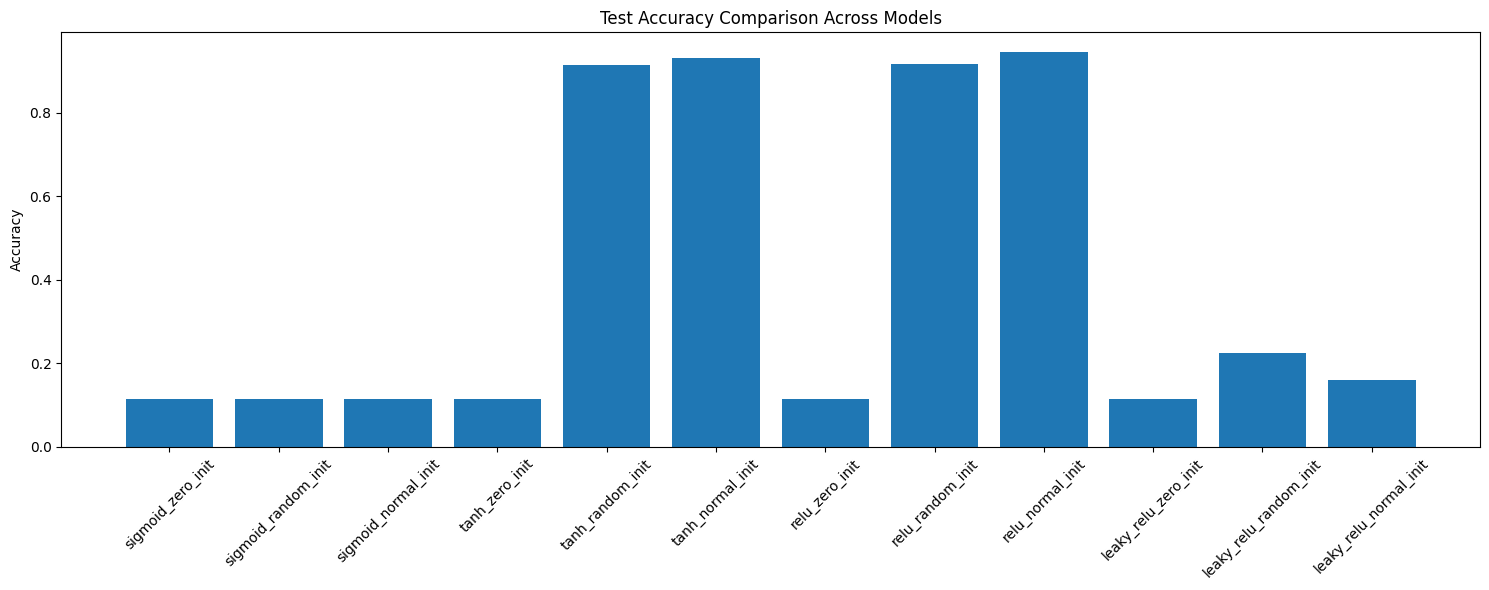

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store test results
test_results = {}

# Load and evaluate each model
for activation in ['sigmoid', 'tanh', 'relu', 'leaky_relu']:
    for weight_init in ['zero_init', 'random_init', 'normal_init']:
        model_name = f"{activation}_{weight_init}"
        
        # Load the model
        with open(f'model_{model_name}.pkl', 'rb') as f:
            model = pickle.load(f)
        
        # Get predictions and accuracy on test set
        test_accuracy = model.score(X_test, Y_test)
        test_predictions = model.predict_proba(X_test)
        test_loss = model.compute_loss(Y_test, test_predictions)
        
        # Store results
        test_results[model_name] = {
            'accuracy': test_accuracy,
            'loss': test_loss
        }
        
        print(f"\nResults for {model_name}:")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}")

# Create a comparison plot
plt.figure(figsize=(15, 6))
names = list(test_results.keys())
accuracies = [test_results[name]['accuracy'] for name in names]

plt.bar(names, accuracies)
plt.xticks(rotation=45)
plt.title('Test Accuracy Comparison Across Models')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()



# Neural Network Performance Analysis on MNIST Dataset

## Test Results
### Best Performing Models
- **ReLU + Normal Init**: 94.60% accuracy (Loss: 0.1825)
- **Tanh + Normal Init**: 93.27% accuracy (Loss: 0.2503)
- **ReLU + Random Init**: 91.80% accuracy (Loss: 0.2809)

## Detailed Analysis

### Initialization Methods

#### Normal Initialization
```python
def normal_init(input_size, output_size):
    # Using Xavier/Glorot initialization
    scale = np.sqrt(2.0 / (input_size + output_size))
    weights = np.random.normal(0, scale, (input_size, output_size))
```

- **Maintains optimal variance through layers**
- **Prevents vanishing/exploding gradients**
- **Best performer across activations**

#### Random Initialization
```python
def random_init(input_size, output_size):
    # Using He initialization
    scale = np.sqrt(2.0 / input_size)
    weights = np.random.uniform(-scale, scale, (input_size, output_size))
```

- **Good performance with ReLU and Tanh**
- **Second-best choice for most activations**

#### Zero Initialization
```python
def zero_init(input_size, output_size):
    weights = np.zeros((input_size, output_size))
```

- **Consistent 11.35% accuracy (random chance)**
- **Creates symmetry problem**
- **All neurons learn identical features**

### Activation Functions

#### ReLU
```python
def relu(x, derivative=False):
    if derivative:
        return (x > 0).astype(float)
    return np.maximum(0, x)
```

- **Best performance**: 94.60% accuracy
- **Benefits**:
  - No saturation
  - Fast convergence
  - Sparse activations

#### Tanh
```python
def tanh(x, derivative=False):
    tanh_x = np.tanh(x)
    if derivative:
        return 1 - tanh_x ** 2
    return tanh_x
```

- **Strong performance**: 93.27% accuracy
- **Benefits**:
  - Zero-centered outputs
  - Strong gradients
  - Bounded output [-1,1]

#### Sigmoid and Leaky ReLU
- **Lower performance due to**:
  - **Sigmoid**: Vanishing gradients
  - **Leaky ReLU**: Potential instability with chosen learning rate

## Key Takeaways

### Initialization Impact
- **Normal initialization** provides stable learning.
- **Zero initialization** prevents learning.
- **Random initialization** offers good baseline performance.

### Activation Choice
- **ReLU**: Best for deep networks
- **Tanh**: Strong alternative
- **Modern architectures** favor ReLU variants.

### Best Practices
- Use **normal initialization**.
- Choose **ReLU** for deep networks.
- **Avoid zero initialization**.
- Monitor **loss curves for stability**.

This analysis demonstrates how proper initialization and activation choices significantly impact neural network performance on the MNIST dataset.
```